In [23]:
# https://docs.google.com/document/d/1kdxaoBjjZMAF_smijxMmgpg9Zyaxcr-C2WonApnvqVY/edit#heading=h.h71b4s4y6uos

In [24]:
# https://habrahabr.ru/company/ods/blog/325432/
# https://habrahabr.ru/company/dca/blog/274027/
# https://habrahabr.ru/post/331382/
# https://habrahabr.ru/post/322438/

## Высокоуровневая работа с нейронными сетями (Keras)

Последовательное описание модели, добавление слоев нейронной сети

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

model = Sequential([
    Dense(32, input_shape=(784,)), # 784 размерность входных данных, 32 размерность выходных данных
    Activation('relu'), # тип функции активации
    Dense(10),
    Activation('softmax'),
])

Другой вариант определения модели через последовательное добавление слоев

In [26]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.5)) # Dropout слой, значение от 0 до 1 определяет долю исключенных входных нейронов
model.add(Dense(10))
model.add(Activation('softmax'))

###  Пример с многослойным перцептроном

Выгрузка датасета MNIST

In [27]:
from keras.datasets import mnist
import keras
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [28]:
x_train.shape

(60000, 28, 28)

In [29]:
# x_train[0]

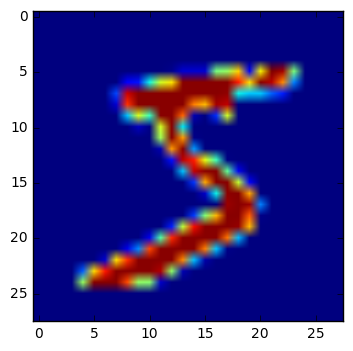

In [30]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(x_train[0])

In [31]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [32]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [33]:
# convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [34]:
y_train[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

Построение модели многослойного перцептрона (полносвязной нейронной сети)

![title](mlp-network.png)

In [35]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout

num_classes = 10

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [36]:
model.output_shape

(None, 10)

Обучение модели

In [37]:
from keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

batch_size = 128
epochs = 2

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 11s - loss: 0.2457 - acc: 0.9234 - val_loss: 0.1015 - val_acc: 0.9684
Epoch 2/2
60000/60000 [==============================] - 10s - loss: 0.1014 - acc: 0.9691 - val_loss: 0.0734 - val_acc: 0.9770


Валидация модели

In [38]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0733997279553
Test accuracy: 0.977


Сохранение конфигурации модели

In [39]:
from keras.models import model_from_yaml
yaml_string = model.to_yaml()
model = model_from_yaml(yaml_string)

In [40]:
print(model.to_json())

{"keras_version": "2.0.8", "config": [{"config": {"trainable": true, "kernel_constraint": null, "name": "dense_13", "use_bias": true, "activity_regularizer": null, "units": 512, "activation": "relu", "kernel_regularizer": null, "bias_constraint": null, "batch_input_shape": [null, 784], "bias_regularizer": null, "dtype": "float32", "bias_initializer": {"config": {}, "class_name": "Zeros"}, "kernel_initializer": {"config": {"seed": null, "mode": "fan_avg", "scale": 1.0, "distribution": "uniform"}, "class_name": "VarianceScaling"}}, "class_name": "Dense"}, {"config": {"name": "dropout_4", "trainable": true, "rate": 0.2}, "class_name": "Dropout"}, {"config": {"trainable": true, "kernel_constraint": null, "name": "dense_14", "use_bias": true, "activity_regularizer": null, "units": 512, "activation": "relu", "bias_constraint": null, "bias_regularizer": null, "bias_initializer": {"config": {}, "class_name": "Zeros"}, "kernel_regularizer": null, "kernel_initializer": {"config": {"seed": null, 

Сохранение модели

In [41]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
model = keras.models.load_model('my_model.h5')

/Users/renat/anaconda3/lib/python3.5/site-packages/keras/models.py:251: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


### Сверточные нейронные сети

Выгрузка датасета MNIST

In [42]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 2

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


Построение модели сверточной нейронной сети

![title](LeNet.png)

In [43]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape)) # слой свертки
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])



Обучение модели

In [44]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 212s - loss: 0.3408 - acc: 0.8963 - val_loss: 0.0781 - val_acc: 0.9752
Epoch 2/2
60000/60000 [==============================] - 220s - loss: 0.1181 - acc: 0.9655 - val_loss: 0.0556 - val_acc: 0.9830
Test loss: 0.0556264675482
Test accuracy: 0.983


### Рекуррентные нейронные сети

![title](RNN-unrolled.png)

Выгрузка датасета MNIST

In [45]:
import keras
from keras.datasets import mnist

num_classes = 10

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], -1, 1)
x_test = x_test.reshape(x_test.shape[0], -1, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 784, 1)
60000 train samples
10000 test samples


Построение модели рекуррентной нейронной сети

In [46]:
# from keras.models import Sequential
# from keras.layers import Dense, Activation
# from keras.layers import SimpleRNN
# from keras import initializers
# from keras.optimizers import RMSprop

# batch_size = 32
# epochs = 2
# hidden_units = 100

# learning_rate = 1e-6

# model = Sequential()
# model.add(SimpleRNN(hidden_units,
#                     kernel_initializer=initializers.RandomNormal(stddev=0.001),
#                     recurrent_initializer=initializers.Identity(gain=1.0),
#                     activation='relu',
#                     input_shape=x_train.shape[1:]))
# model.add(Dense(num_classes))
# model.add(Activation('softmax'))
# rmsprop = RMSprop(lr=learning_rate)
# model.compile(loss='categorical_crossentropy',
#               optimizer=rmsprop,
#               metrics=['accuracy'])

Обучение модели

In [47]:
# batch_size = 32
# epochs = 2

# model.fit(x_train, y_train,
#           batch_size=batch_size,
#           epochs=epochs,
#           verbose=1,
#           validation_data=(x_test, y_test))

# scores = model.evaluate(x_test, y_test, verbose=0)
# print('IRNN test score:', scores[0])
# print('IRNN test accuracy:', scores[1])

## Валидация и оценка качества алгоритмов машинного обучения

In [48]:
# TODO

In [49]:
# http://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/modules/cross_validation.html
# https://github.com/jakevdp/PythonDataScienceHandbook

Выгрузка данных по датасету Iris

In [50]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

Построение простой модели на основе метода k ближайших соседей

In [51]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

Разбиение на обучающую и тестовую выборки

In [52]:
from sklearn.cross_validation import train_test_split
# split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                  train_size=0.5)

# fit the model on one set of data
model.fit(X1, y1)

/Users/renat/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

Получение точности предсказаний модели accuracy_score

In [53]:
from sklearn.metrics import accuracy_score

# evaluate the model on the second set of data
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.90666666666666662

In [54]:
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.95999999999999996, 0.90666666666666662)

Кросс-валидация

In [55]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([ 0.96666667,  0.96666667,  0.93333333,  0.93333333,  1.        ])

### Bias-variance tradeoff

Пример с аппроксимацией

In [56]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

Генерация данных

In [57]:
import numpy as np

def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

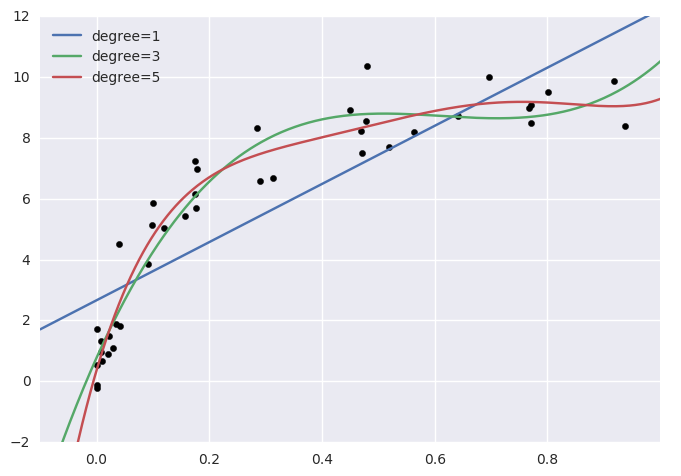

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

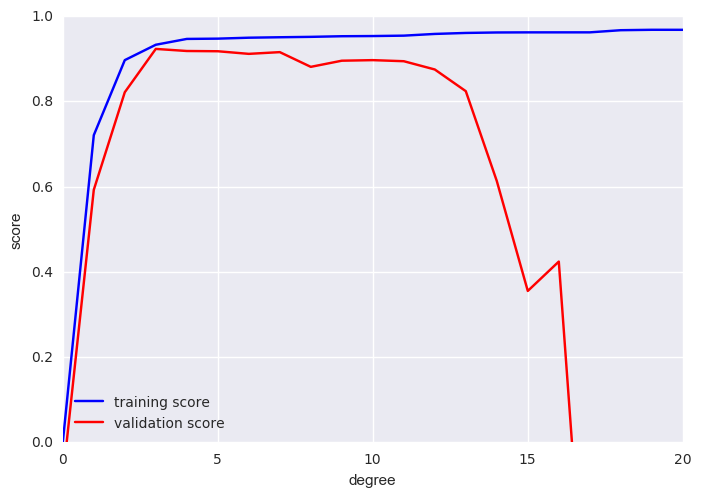

In [59]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

In [60]:
# degree=1 underfit high bias, degree 15 overfit high variance

GridSearchCV

In [61]:
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)


In [62]:
grid.fit(X, y);
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

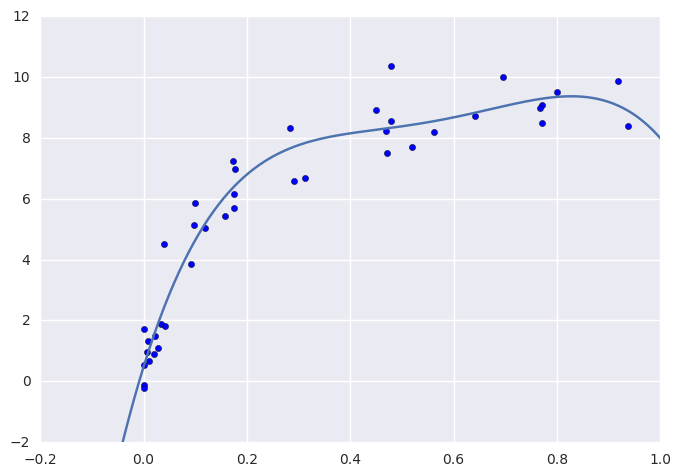

In [63]:
model = grid.best_estimator_

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test, hold=True);
plt.axis(lim);

In [64]:
# https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html

### Пример с распознаванием рукописных цифр

In [65]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['images', 'DESCR', 'target_names', 'target', 'data'])

In [66]:
digits.data[0].shape

(64,)

In [67]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))
plt.cla()

In [68]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

### Метрики качества precision, recall, f1-score, support

In [69]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest, digits=3))

             precision    recall  f1-score   support

          0      1.000     0.974     0.987        38
          1      0.977     0.955     0.966        44
          2      0.955     1.000     0.977        42
          3      0.978     0.978     0.978        45
          4      0.974     1.000     0.987        37
          5      0.979     0.959     0.969        49
          6      1.000     1.000     1.000        52
          7      1.000     0.960     0.980        50
          8      0.938     0.978     0.957        46
          9      0.979     0.979     0.979        47

avg / total      0.978     0.978     0.978       450



In [70]:
type(ypred), type(ytest)

(numpy.ndarray, numpy.ndarray)

In [71]:
import numpy as np
tp = np.intersect1d(np.where(ypred==0), np.where(ytest==0)).size
fp = np.intersect1d(np.where(ypred==0), np.where(ytest!=0)).size
fn = np.intersect1d(np.where(ypred!=0), np.where(ytest==0)).size

In [72]:
# The support is the number of occurrences of each class in y_true
np.where(ypred==0)[0].size

38

In [73]:
# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score
precision = tp / (tp + fn)
precision

1.0

In [74]:
# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score
recall = tp / (tp + fp)
recall

0.9736842105263158

In [75]:
# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score
F1 = 2 * (precision * recall) / (precision + recall)
F1

0.9866666666666666

Матрица неточностей (confusion matrix)

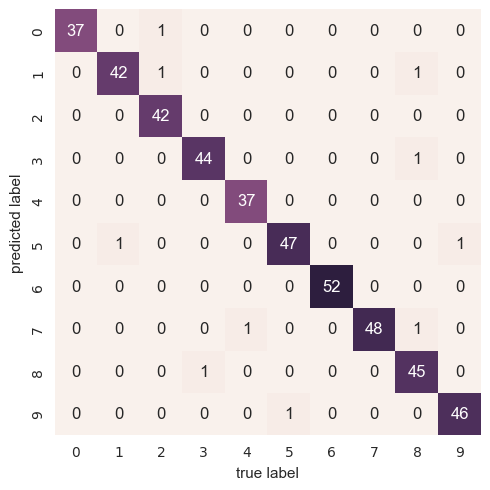

In [76]:
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [77]:
# By definition a confusion matrix C is such that C_{i, j} is equal 
# to the number of observations known to be in group i but predicted to be in group j.

In [78]:
# known to be in group i but predicted to be in group j

In [79]:
# known to be in group 2 but predicted to be in group 0
np.intersect1d(np.where(ypred==0), np.where(ytest==2)).size

1